# Knn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

reading the data 

In [3]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


splitting it into test and trainning data

In [5]:
X = df.iloc[:, 1:785].values
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0 )

len(X_train)

21000

Trainning the model

In [11]:
from sklearn.neighbors import KNeighborsClassifier
tree_model = KNeighborsClassifier(n_neighbors=1)
tree_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Applying the model on the test data

In [12]:
predicted = tree_model.predict(X_test)
expected = y_test
print(predicted[0:50])
print(expected[0:50])

[3 6 9 5 6 9 6 0 0 1 7 1 5 7 8 1 1 5 9 6 9 2 2 8 4 6 2 5 4 4 8 2 8 9 3 8 9
 5 2 7 6 3 1 7 9 7 4 2 5 0]
[3 6 9 5 6 5 6 0 0 1 7 1 5 7 8 1 1 5 9 6 9 2 2 8 4 6 2 5 4 4 8 2 8 9 3 8 4
 5 2 7 6 3 1 7 9 7 4 2 5 0]


**Measuring the performace of the model**

In [6]:
print("Accuracy:", tree_model.score(X_test, y_test))

('Accuracy:', 0.959952380952381)


In [7]:
print("confusion_matrix:")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted))


confusion_matrix:
[[2045    1    3    2    0    4    8    0    0    1]
 [   0 2330    8    2    2    1    4    5    2    1]
 [  19   18 2023   13    2    2    2   41    8    4]
 [   4    2   13 2082    0   38    3   15   24   10]
 [   1   19    0    0 1927    0    7    4    1   67]
 [   5    1    0   39    4 1789   36    1    4   15]
 [  11    3    1    0    3    8 2051    0    0    0]
 [   1   19   10    1    4    0    0 2129    0   27]
 [   7   19   10   45   11   37   10    5 1824   23]
 [   6    2    1   13   34    8    1   52    3 1959]]


In [8]:
print("Classification report:")
from sklearn.metrics import classification_report 
print(classification_report(y_test, predicted))

Classification report:
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2064
          1       0.97      0.99      0.98      2355
          2       0.98      0.95      0.96      2132
          3       0.95      0.95      0.95      2191
          4       0.97      0.95      0.96      2026
          5       0.95      0.94      0.95      1894
          6       0.97      0.99      0.98      2077
          7       0.95      0.97      0.96      2191
          8       0.98      0.92      0.95      1991
          9       0.93      0.94      0.94      2079

avg / total       0.96      0.96      0.96     21000



**Viewing the the ones that predicted wrong**

In [13]:
(y_test != predicted).sum()

841

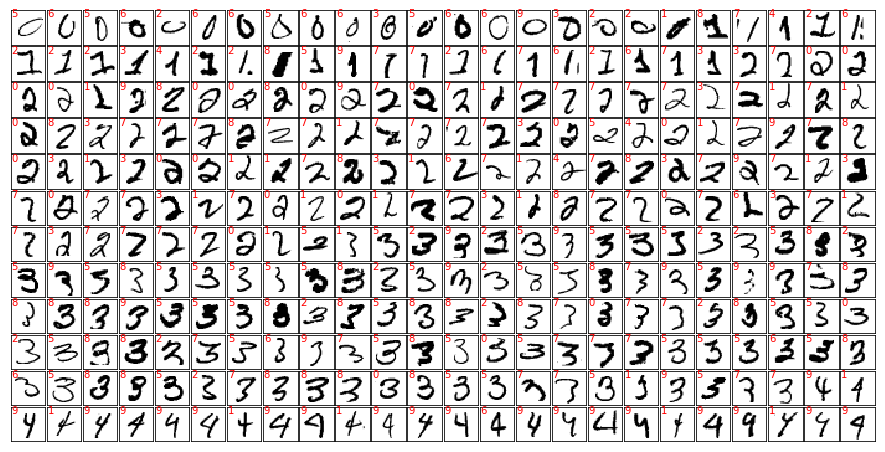

In [17]:
wrong = X_test[y_test != predicted]
wrong_pred = predicted[y_test != predicted]
wrong_exp = y_test[y_test != predicted]

fig = plt.figure(figsize=(12, 12))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

#sorting the output by number to make them easy to v
index_sort = wrong_exp.argsort()

# plot the digits: each image is 28x28 pixels
for i in range(288):
    ax = fig.add_subplot(24, 24, i + 1, xticks=[], yticks=[])
    ax.imshow(wrong[index_sort].reshape(-1, 28, 28)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    ax.text(0, 5, str(wrong_pred[index_sort][i]), color='red')
    
    # label the image with the target value
    #if predicted[i] == expected[i]:
    #    ax.text(0, 7, str(predicted[i]), color='green')
    #else:
    #    ax.text(0, 7, str(predicted[i]), color='red')
